In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
def resize_images(input_dir, output_dir, target_size=(266, 266)):
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Loop through files in input directory
    for filename in os.listdir(input_dir):
        lowercase_filename = filename.lower()
        if lowercase_filename.endswith('.jpg') or lowercase_filename.endswith('.png'):
            # Read image
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path)     

            # Resize image
            resized_image = cv2.resize(image, target_size)

            # Save resized image to output directory
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, resized_image)
            
            print(f"Resized and saved {filename} to {output_path}")

    print("Done resizing and saving images.")

In [ ]:
input_directory = 'pics/raw/mango-tree'
output_dirrectory = 'pics/resized/mango-tree'

resize_images(input_directory,output_dirrectory)

In [ ]:
mulawain_raw = 'pics/raw/mulawin'
mulawin_resized = 'pics/resized/mulawin'

resize_images(mulawain_raw,mulawin_resized)

In [ ]:
input_dir = 'pics/raw/palong-maria'
output_dir = 'pics/resized/palong-maria'

resize_images(input_dir, output_dir)

In [9]:
def extract_features(image):
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	hog = cv2.HOGDescriptor()
	features = hog.compute(gray)
	return features.flatten()

In [10]:
def load_images_from_directory(directory):
    images = []
    labels = []
    class_names = []
    for root,dirs,files, in os.walk(directory):
        for class_name in dirs:
            class_dir = os.path.join(root, class_name)
            for filename in os.listdir(class_dir):
                img_path = os.path.join(class_dir, filename)
                image = cv2.imread(img_path)
                if image is not None:
                    images.append(image)
                    labels.append(class_name)
                    class_names.append(class_name)
    return images, labels, class_names

In [11]:
def visualize_class_distribution(labels, class_names):
    class_counts = {class_name: labels.count(class_name) for class_name in set(class_names)}
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()
    total_samples = sum(class_counts.values())
    for class_name, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f'{class_name}: {count} samples ({percentage:.2f}%)')

In [12]:
directory = 'pics/resized'

In [13]:
images, labels, class_names = load_images_from_directory(directory)

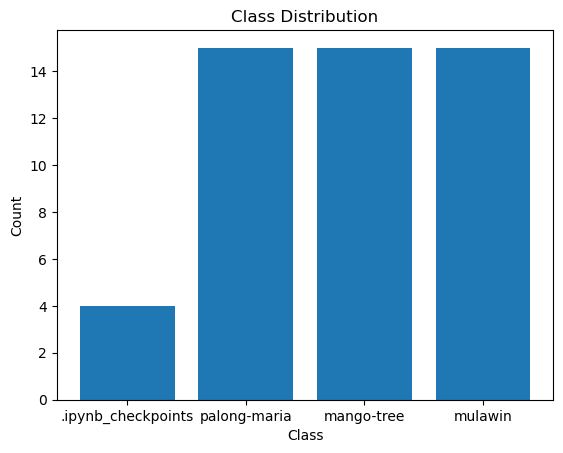

.ipynb_checkpoints: 4 samples (8.16%)
palong-maria: 15 samples (30.61%)
mango-tree: 15 samples (30.61%)
mulawin: 15 samples (30.61%)


In [14]:
visualize_class_distribution(labels, class_names)

In [1]:
features = np.array([extract_features(img) for img in images])

NameError: name 'np' is not defined

In [16]:
# 30% test size mas maganda kapag maunti palang data mo
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state=42)

# Class of Different Models

In [30]:
class SVMClassifier:
    def __init__(self, kernel='linear'):
        self.classifier = SVC(kernel=kernel)
    
    def train(self, X_train, y_train):
        self.classifier.fit(X_train, y_train)
    
    def predict(self, X_test):
        return self.classifier.predict(X_test)

class RandomForest:
    def __init__(self, n_estimators=100):
        self.classifier = RandomForestClassifier(n_estimators=n_estimators)
    
    def train(self, X_train, y_train):
        self.classifier.fit(X_train, y_train)
    
    def predict(self, X_test):
        return self.classifier.predict(X_test)

class NaiveBayes:
    def __init__(self):
        self.classifier = GaussianNB()
    
    def train(self, X_train, y_train):
        self.classifier.fit(X_train, y_train)
    
    def predict(self, X_test):
        return self.classifier.predict(X_test)

class DecisionTree:
    def __init__(self, max_depth=3):
        self.classifier = DecisionTreeClassifier(max_depth=max_depth)
    
    def train(self, X_train, y_train):
        self.classifier.fit(X_train, y_train)
    
    def predict(self, X_test):
        return self.classifier.predict(X_test)

class KNNClassifier:
    def __init__(self, n_neighbors=2):
        self.classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    def train(self, X_train, y_train):
        self.classifier.fit(X_train, y_train)
    
    def predict(self, X_test):
        return self.classifier.predict(X_test)

class LogisticRegressionClassifier:
    def __init__(self, penalty='l2', C=1.0, solver='lbfgs'):
        self.classifier = LogisticRegression(penalty=penalty, C=C, solver=solver)
    
    def train(self, X_train, y_train):
        self.classifier.fit(X_train, y_train)
    
    def predict(self, X_test):
        return self.classifier.predict(X_test)
    

In [18]:
svm_classifier = SVMClassifier(kernel='linear')
svm_classifier.train(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [19]:
rf_classifier = RandomForest(n_estimators=100)
rf_classifier.train(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [20]:
nb_classifier = NaiveBayes()
nb_classifier.train(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [22]:
dt_classifier = DecisionTree(max_depth=3)
dt_classifier.train(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [29]:
# knn_classifier = KNNClassifier(n_neighbors=1)
# knn_classifier.train(X_train, y_train)
# y_pred_knn = knn_classifier.predict(X_test)
# accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [38]:
# lr_classifier = LogisticRegressionClassifier(penalty='l2', C=1.0, solver='lbfgs')
# lr_classifier.train(X_train, y_train)
# y_pred_lr = lr_classifier.predict(X_test)
# accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [39]:
print("Accuracy SVM:", accuracy_svm * 100)
print("Accuracy Random Forest:", accuracy_rf * 100)
print("Accuracy Naive Bayes:", accuracy_nb * 100)
print("Accuracy Decision Tree:", accuracy_dt * 100)
# print("Accuracy KNN:", accuracy_knn * 100)
# print("Accuracy Logistic Regression:", accuracy_lr * 100)

Accuracy SVM: 60.0
Accuracy Random Forest: 60.0
Accuracy Naive Bayes: 60.0
Accuracy Decision Tree: 33.33333333333333


In [40]:
def preprocess_image(image_path, save_path):
    image = cv2.imread(image_path)

    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(save_path, grayscale_image)
    return grayscale_image

In [41]:
input_image_path = 'pics/resized/mango-tree/IMG_5519.JPG'
save_path = 'image1_mango-tree.jpg'
preprocessed_image = preprocess_image(input_image_path,save_path)

In [42]:
input_image = cv2.imread('image1_mango-tree.jpg')

if input_image is not None:
    input_features = extract_features(input_image).reshape(1,-1)
    svm_pred = svm_classifier.predict(input_features)[0]
    rfc_pred = rf_classifier.predict(input_features)[0]
    nb_pred = nb_classifier.predict(input_features)[0]
    dt_pred = dt_classifier.predict(input_features)[0]
  
    # Display the input image
    cv2.imshow('Input Image', input_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print("SVM PRED:", svm_pred)
    print("RFC PRED:", rfc_pred)
    print("NB PRED:", nb_pred)
    print("DT PRED:", dt_pred)
else:
    print("Error unable to read input image")

SVM PRED: mango-tree
RFC PRED: mango-tree
NB PRED: mango-tree
DT PRED: mango-tree
